### 이미지와 시계열 처리 모델
  * CNN(합성곱 신경망; Convolutional Neural Network), RNN(순환 신경망; Recurrent Neural Network)
    * 이미지는 일반적으로 CNN으로 처리
    * 시계열 데이터는 RNN으로 처리
  * 이미지를 처리하기 위해 CNN뿐만 아니라 완전 연결 계층(Fully Connected Layer) 방식을 이용할 수 있음
  * RNN은 순차적(시계열) 데이터 학습에 특화된 인공 신경망
    * 내부의 순환 구조로 동작하는 방식임

#### 이미지 처리 모델
  * 여기서는 완전 연결 계층(Fully Connected Layer) 방식으로 진행

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(test_labels)

[7 2 1 ... 4 5 6]


Index 0: Label 7


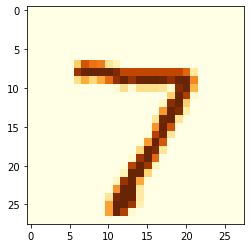

In [3]:
plt.imshow(test_data[0], cmap=plt.cm.YlOrBr)
print(f'Index {0}: Label {test_labels[0]}')

In [4]:
print(train_data[0].shape)

(28, 28)


In [5]:
print(test_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [6]:
width = 28
height = 28
"""
28 * 28 = 784, 총 784개 특성(feature)을 가지고 있음
evidence yi(최종 누적 값) = Σj (Wi,j(가중치) * xj(픽셀의 intensity, 감도))
"""

x_train = train_data.reshape(60000, width*height).astype('float32') / 255.0
x_test = test_data.reshape(10000, width*height).astype('float32') / 255.0

y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential([
    Dense(256, input_dim=width*height, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32)

model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6268 - accuracy: 0.8464
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3284 - accuracy: 0.9084
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2798 - accuracy: 0.9218
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2499 - accuracy: 0.9294
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2269 - accuracy: 0.9356
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2082 - accuracy: 0.9417
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1926 - accuracy: 0.9459
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1789 - accuracy: 0.9499
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1672 - accuracy: 0.9531
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.157

[0.10715685784816742, 0.9685999751091003]

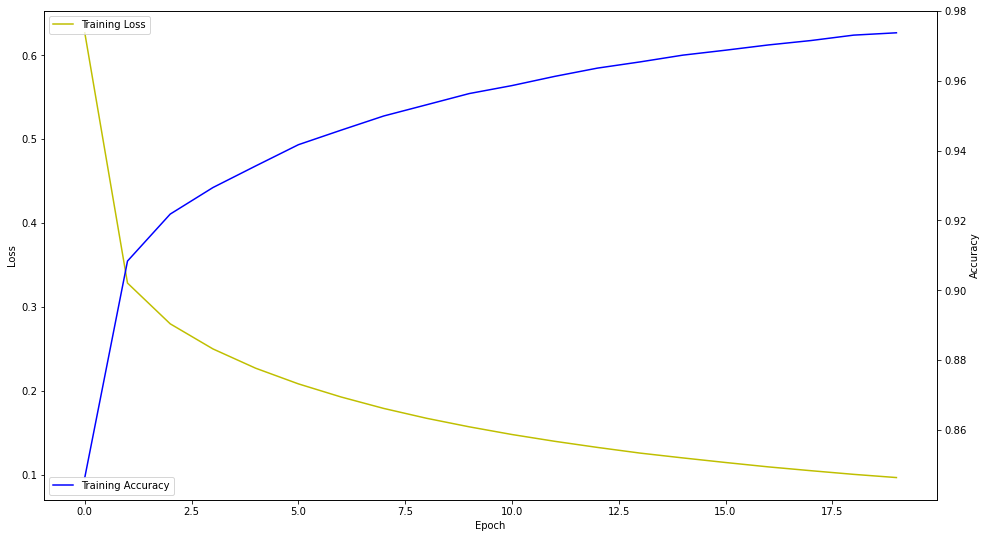

In [9]:
history_dict = history.history

fig, loss_ax = plt.subplots(figsize=(16, 9))

acc_ax = loss_ax.twinx()

loss_ax.plot(history_dict['loss'], 'y', label='Training Loss')
# loss_ax.plot(history_dict['val_loss'], 'r', label='Validation Loss')

acc_ax.plot(history_dict['accuracy'], 'b', label='Training Accuracy')
# acc_ax.plot(history_dict['val_accuracy'], 'g', label='Validation Accuracy')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

##### 필기 숫자 데이터 세트를 다양한 기계학습 모델에 적용하기

In [10]:
# 공통 코드
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [11]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

width = 28
height = 28

train_data = train_data.reshape(60000, width*height).astype('float32') / 255.0
test_data = test_data.reshape(10000, width*height).astype('float32') / 255.0

In [12]:
# 결정트리를 이용하는 경우
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
print(accuracy_score(test_labels, predictions))

0.8761


In [13]:
# KNeighborsClassifier 를 이용하는 경우
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data
labels = digits.target

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9861111111111112


In [14]:
# 직접 작성한 무작위 분류 방식을 이용한 경우
import random
from sklearn.metrics import accuracy_score


class myKNN():
    def fit(self, train_data, train_labels) -> None:
        self.train_data = train_data
        self.train_labels = train_labels
    
    def predict(self, test_data) -> list:
        predictions = []
        for row in test_data:
            label = random.choice(self.train_labels)
            predictions.append(label)
        return predictions


clf = myKNN()
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.08055555555555556


In [15]:
# 직접 작성한 유클리디언 분류 방식을 이용한 경우
from scipy.spatial import distance
from sklearn.metrics import accuracy_score


def euc(a, b) -> float:
    return distance.euclidean(a, b)


class eucKNN():
    def fit(self, train_data, train_labels) -> None:
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self, test_data) -> list:
        predictions = []
        for row in test_data:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row) -> int:
        best_dist = euc(row, self.train_data[0])
        best_idx = 0

        for idx, tr_data in enumerate(self.train_data):
            if idx == 0:
                continue
            dist = euc(row, tr_data)
            if dist < best_dist:
                best_dist = dist
                best_idx = idx
        
        return self.train_labels[best_idx]


clf = eucKNN()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9833333333333333


In [16]:
# 필기 숫자 데이터 세트를 이용한 경우
from sklearn.datasets import load_digits
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [17]:
digits = load_digits()
print(len(digits.data), len(digits.target))

1797 1797


In [18]:
def euc(a, b):
    return distance.euclidean(a, b)


class eucKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_idx = 0

        for idx, tr_data in enumerate(self.X_train):
            if idx == 0:
                continue
            dist = euc(row, self.X_train[idx])
            if dist < best_dist:
                best_dist = dist
                best_idx = idx
        
        return self.y_train[best_idx]


clf = eucKNN()
clf.fit(digits.data[:-500], digits.target[:-500])
predictions = clf.predict(digits.data[-500:])

print(accuracy_score(digits.target[-500:], predictions))

0.96


In [19]:
# 서포트 벡터 머신(SVM)을 이용한 경우 - hand written data(필기 숫자 데이터)
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)

print(accuracy_score(test_labels, predictions))

0.9888888888888889


In [20]:
import pandas as pd

In [21]:
dataset = pd.read_csv('./tutorial/16/airline-passengers.csv', engine='python')
dataset.head(3)


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


In [22]:
dataset.pop('Month')
dataset.tail(3)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
142,390.0
143,432.0
144,NaN


In [23]:
dataset.columns = ['Passengers']
dataset.head(3)

,Passengers
0,112.0
1,118.0
2,132.0


In [24]:
dataset = dataset.dropna()
dataset.tail(3)

,Passengers
141,461.0
142,390.0
143,432.0


In [25]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler # 데이터 정규화를 위한 Min-Max 방식

In [26]:
scaled = MinMaxScaler()
dataset = scaled.fit_transform(dataset)
print(dataset[:3])

[[0.01544402]
 [0.02702703]
 [0.05405405]]


In [27]:
train = dataset[:120]
test = dataset[120:]
print(test.shape)

(24, 1)


In [28]:
def create_seq(data, lookback=1):
    X_data = []
    y_data = []

    for i in range(len(data) - lookback - 1):
        add = data[i:(i+lookback), 0]
        X_data.append(add)
        y_data.append(data[i + lookback, 0])
    
    return np.array(X_data), np.array(y_data)

In [29]:
lookback = 1
X_train, y_train = create_seq(train, lookback)
X_test, y_test = create_seq(test, lookback)

print(X_train[:6])
print(y_train[:5])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]]
[0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]


In [30]:
"""
현재 처리하고자 하는 데이터 형식이 3D 시퀀스 데이터이므로 텐서의 형식은 (samples, timesteps, features) 이어야 함
"""
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape

(118, 1, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [32]:
model = Sequential([
    Flatten(input_shape=(1, X_train.shape[1])),
    Dense(1)
])

model.compile(optimizer='rmsprop', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
118/118 [==============================] - 1s 1ms/step - loss: 0.0252
Epoch 2/50
118/118 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 3/50
118/118 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 4/50
118/118 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 8/50
118/118 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 9/50
118/118 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 10/50
118/118 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 11/50
118/118 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 12/50
118/118 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 13/50
118/118 [====

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 59ms/step


In [34]:
# 앞서 시행했던 MinMax 정규화 상태를 다시 원래 스케일로 복원 - `inverse_transform()` 함수 사용
train_predict = scaled.inverse_transform(train_predict)
train_Y = scaled.inverse_transform([y_train])
test_predict = scaled.inverse_transform(test_predict)
test_Y = scaled.inverse_transform([y_test])

In [35]:
import matplotlib.pyplot as plt

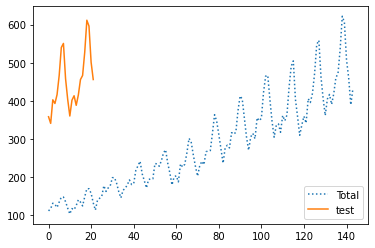

In [36]:
plt.plot(scaled.inverse_transform(dataset), linestyle=':', label='Total')
plt.plot(test_predict, label='test')
plt.legend()

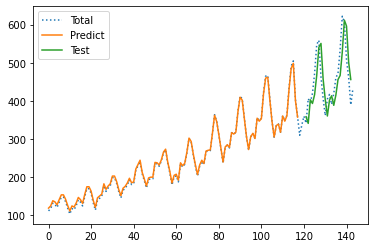

In [37]:
plt.plot(scaled.inverse_transform(dataset), linestyle=':', label='Total')
plt.plot(train_predict, label='Predict')

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict) + (lookback * 2) + 1:len(dataset) - 1] = test_predict

plt.plot(test_predict_plot, label='Test')
plt.legend()
plt.show()

In [38]:
print(y_test.shape)
y_test = np.reshape(X_test, (test_predict.shape[0], X_test.shape[1]))
print(y_test.shape)

(22,)
(22, 1)


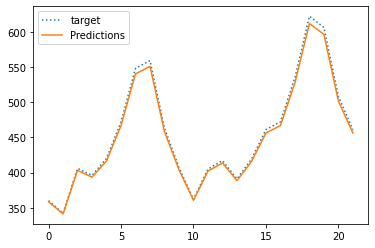

In [39]:
plt.plot(range(len(y_test)), scaled.inverse_transform(y_test), linestyle=':', label='target')
plt.plot(range(len(test_predict)), test_predict, label='Predictions')
plt.legend()
plt.show()

#### 순환 신경망(RNN)
  * 앞의 은닉 계층에서 활성화 함수로 계산되어 출력되는 데이터를 이후 계층으로 전송하는 동시에 다시 이전 계층의 입력으로 보내져 재사용하게 되는 신경망 구조
  * 즉, 과거의 정보를 현재에 반영할 수 있다는 의미
  * 초기 모델은 경사 하강법(Gradient Descent)과 오차 역전파(Backpropagation) 방식을 이용하여 학습
    * 학습 데이터 길이가 길어질수록 과거 정보를 전달하기 힘들다는 단점을 가짐
  * 이러한 단점을 보완하기 위하여 LSTM(Long Short-Term Memory) 방식을 사용, 이후 개선된 GRU(Gated Recurrent Unit) 방식이 생겨남
  * 여기서는 LSTM 방식을 사용하여 순환 신경망 모델 구성

In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [41]:
# 데이터 생성
dataset = pd.read_csv('./tutorial/16/airline-passengers.csv', engine='python')

# 데이터 전처리
dataset.pop('Month')
dataset.columns = ['Passengers']
dataset = dataset.dropna()

scaled = MinMaxScaler()
dataset = scaled.fit_transform(dataset)

# 데이터 분할
train = dataset[:120]
test = dataset[120:]

In [42]:
# 시계열 데이터 준비

def create_seq(data, lookback=1):
    X_data = []
    y_data = []

    for i in range(len(data) - lookback - 1):
        add = data[i:(i+lookback), 0]
        X_data.append(add)
        y_data.append(data[i + lookback, 0])

    return np.array(X_data), np.array(y_data)

In [43]:
import numpy as np

In [44]:
lookback = 1

X_train, y_train = create_seq(train, lookback)
X_test, y_test = create_seq(test, lookback)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [46]:
model = Sequential([
    LSTM(4, input_shape=(1, lookback)),
    Dense(1)
])

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=1)

Epoch 1/30
94/94 [==============================] - 3s 10ms/step - loss: 0.0269 - mae: 0.1234 - val_loss: 0.1048 - val_mae: 0.3077
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0129 - mae: 0.0876 - val_loss: 0.0696 - val_mae: 0.2451
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0107 - mae: 0.0838 - val_loss: 0.0605 - val_mae: 0.2267
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.0098 - mae: 0.0810 - val_loss: 0.0525 - val_mae: 0.2094
Epoch 5/30
94/94 [==============================] - 0s 4ms/step - loss: 0.0090 - mae: 0.0771 - val_loss: 0.0461 - val_mae: 0.1946
Epoch 6/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0081 - mae: 0.0735 - val_loss: 0.0439 - val_mae: 0.1898
Epoch 7/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0074 - mae: 0.0701 - val_loss: 0.0398 - val_mae: 0.1796
Epoch 8/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0066 - mae: 0.0

In [47]:
import matplotlib.pyplot as plt

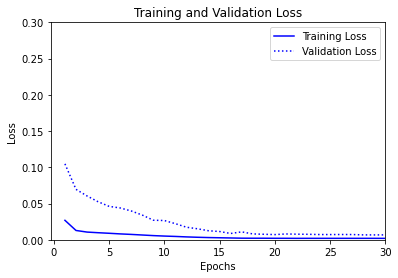

In [48]:
history_dict = history.history

plt.clf()
epoch_range = range(1, epochs + 1)
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training Loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:', label='Validation Loss')
plt.axis([-0.3, epochs, 0, 0.3])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
# GRU 모델
from keras.models import Sequential
from keras.layers import Dense, GRU

In [50]:
model = Sequential([
    GRU(4, input_shape=(1, lookback)),
    Dense(1)
])

model.compile(optimizer='rmsprop', loss='mse', metrics='mae')

epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=1)

Epoch 1/30
94/94 [==============================] - 3s 8ms/step - loss: 0.0407 - mae: 0.1549 - val_loss: 0.1589 - val_mae: 0.3807
Epoch 2/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0201 - mae: 0.1121 - val_loss: 0.1114 - val_mae: 0.3136
Epoch 3/30
94/94 [==============================] - 0s 3ms/step - loss: 0.0177 - mae: 0.1089 - val_loss: 0.0971 - val_mae: 0.2911
Epoch 4/30
94/94 [==============================] - 0s 4ms/step - loss: 0.0164 - mae: 0.1059 - val_loss: 0.0911 - val_mae: 0.2817
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.0153 - mae: 0.1021 - val_loss: 0.0802 - val_mae: 0.2627
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.0144 - mae: 0.0997 - val_loss: 0.0799 - val_mae: 0.2630
Epoch 7/30
94/94 [==============================] - 1s 8ms/step - loss: 0.0134 - mae: 0.0954 - val_loss: 0.0788 - val_mae: 0.2618
Epoch 8/30
94/94 [==============================] - 1s 6ms/step - loss: 0.0128 - mae: 0.09

In [51]:
import matplotlib.pyplot as plt

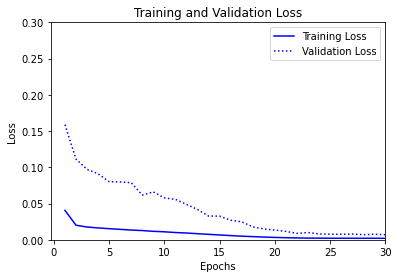

In [52]:
history_dict = history.history

plt.clf()
epoch_range = range(1, epochs + 1)
plt.plot(epoch_range, history_dict['loss'], 'b', label='Training Loss')
plt.plot(epoch_range, history_dict['val_loss'], 'b:', label='Validation Loss')
plt.axis([-0.3, epochs, 0, 0.3])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()